## Importing the libraries & dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Multilingual dataset.csv')
data

,Sentence,Language,Abusive
0,You are an idiot.,English,1
1,तुम बेवकूफ हो।,Hindi,1
2,तुम्हारी बहुत तारीफ हो रही है।,Hindi,0
3,I think you did a great job!,English,0
4,He is such a loser.,English,1
...,...,...,...
194,तुम्हारा सुझाव बहुत मददगार है।,Hindi,0
195,तुम बहुत मेहनती हो।,Hindi,0
196,तुम्हारे शब्द दिल को छू जाते हैं।,Hindi,0
197,ou are such a disgrace to this team,English,1


## Exploring the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  199 non-null    object
 1   Language  199 non-null    object
 2   Abusive   199 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [4]:
data.shape

(199, 3)

In [5]:
data.describe(include='all')

,Sentence,Language,Abusive
count,199,199,199.000000
unique,192,2,NaN
top,यह जगह बहुत खूबसूरत है।,English,NaN
freq,3,102,NaN
mean,NaN,NaN,0.557789
std,NaN,NaN,0.497902
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,1.000000
75%,NaN,NaN,1.000000


In [6]:
data.isnull().sum()

Sentence    0
Language    0
Abusive     0
dtype: int64

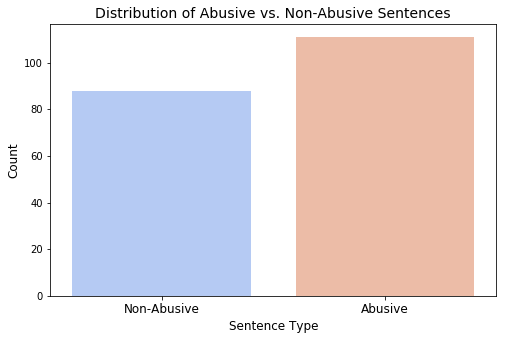

In [7]:
# Count the number of occurrences for each class
label_counts = data['Abusive'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="coolwarm")

# Corrected xticks
plt.xticks([0, 1], ['Non-Abusive', 'Abusive'], fontsize=12)
plt.xlabel('Sentence Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Abusive vs. Non-Abusive Sentences', fontsize=14)
plt.show()


## Translating the Hindi sentences to english using the googletrans library

In [8]:
from googletrans import Translator

# Initialize the translator
translator = Translator()

def translate_to_english(text, lang):
    if lang == "Hindi":
        return translator.translate(text, src='hi', dest='en').text
    else:
        return text  

data['Translated_Sentence'] = data.apply(lambda row: translate_to_english(row['Sentence'], row['Language']), axis=1)

data.head()

,Sentence,Language,Abusive,Translated_Sentence
0,You are an idiot.,English,1,You are an idiot.
1,तुम बेवकूफ हो।,Hindi,1,You are idiot.
2,तुम्हारी बहुत तारीफ हो रही है।,Hindi,0,You are getting very praiseworthy.
3,I think you did a great job!,English,0,I think you did a great job!
4,He is such a loser.,English,1,He is such a loser.


## Text cleaning (removing special characters and converting everything to lowercase)

In [9]:
#dropping the sentences column as we no longer need it
data = data.drop('Sentence', axis = 1)
data.head()

,Language,Abusive,Translated_Sentence
0,English,1,You are an idiot.
1,Hindi,1,You are idiot.
2,Hindi,0,You are getting very praiseworthy.
3,English,0,I think you did a great job!
4,English,1,He is such a loser.


In [10]:
import re

In [11]:
def cleaned_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

In [12]:
data['Cleaned_Sentences'] = data['Translated_Sentence'].apply(cleaned_text)

In [13]:
data.head()

,Language,Abusive,Translated_Sentence,Cleaned_Sentences
0,English,1,You are an idiot.,you are an idiot
1,Hindi,1,You are idiot.,you are idiot
2,Hindi,0,You are getting very praiseworthy.,you are getting very praiseworthy
3,English,0,I think you did a great job!,i think you did a great job
4,English,1,He is such a loser.,he is such a loser


In [14]:
#dropping the translated_sentences column as we no longer need it
data = data.drop('Translated_Sentence', axis = 1)
data.head()

,Language,Abusive,Cleaned_Sentences
0,English,1,you are an idiot
1,Hindi,1,you are idiot
2,Hindi,0,you are getting very praiseworthy
3,English,0,i think you did a great job
4,English,1,he is such a loser


## Tokenization

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\HP/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
tokenize_data = data['Cleaned_Sentences'].apply(nltk.word_tokenize)
print(tokenize_data)

0                               [you, are, an, idiot]
1                                   [you, are, idiot]
2             [you, are, getting, very, praiseworthy]
3                 [i, think, you, did, a, great, job]
4                            [he, is, such, a, loser]
                            ...                      
194             [your, suggestion, is, very, helpful]
195                     [you, are, very, hardworking]
196                  [your, words, touch, the, heart]
197      [ou, are, such, a, disgrace, to, this, team]
198    [your, behavior, is, absolutely, unacceptable]
Name: Cleaned_Sentences, Length: 199, dtype: object


## After tokenizing the data we will remove stopwords

In [17]:
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\HP/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'can', 'from', 'wasn', 'has', 'shouldn', 'her', 'weren', 'during', 'me', 'all', 'each', 'i', 'should', 'its', 'again', 'these', 'until', "wasn't", 'so', 'd', 'between', 'those', 'o', 'his', 'themselves', 'only', 're', 'up', 'is', 'under', 'aren', 'you', 'most', 'out', 'been', 'just', 'yourself', 'some', 'my', 'wouldn', 'hasn', 'below', 'them', 'after', 'had', "wouldn't", 'their', 'whom', "needn't", 'but', 'through', 'll', 'if', 'your', 'on', "couldn't", 'the', 'an', 'too', 'don', 'have', 'myself', 'being', 'does', 'ain', 'mustn', 'what', 'a', 'same', 'why', 'it', 'before', "that'll", 's', 'by', 'that', 'didn', 'than', "should've", 'not', "won't", 'ourselves', 'more', 'there', "she's", 'against', 'are', "weren't", 'himself', 'how', "isn't", 'in', 'own', 'm', 'because', 'about', 'hadn', "you'd", 'am', 'haven', 'was', 'ma', "mightn't", 'do', 'down', 'ours', 'both', 'we', 'itself', 'into', 'herself', 'then', "didn't", 'mightn', 'did', 'and', 'while', 'hers', 've', "hasn't", 'couldn', 'him

In [19]:
def stopword_removal(tokenize_data):
    corpus = []  
    for i in tokenize_data:
        if i not in stop_words:  
            corpus.append(i)  
    return corpus

filtered_reviews = tokenize_data.apply(stopword_removal)

In [20]:
print(filtered_reviews)

0                                   [idiot]
1                                   [idiot]
2                   [getting, praiseworthy]
3                       [think, great, job]
4                                   [loser]
                       ...                 
194                   [suggestion, helpful]
195                           [hardworking]
196                   [words, touch, heart]
197                    [ou, disgrace, team]
198    [behavior, absolutely, unacceptable]
Name: Cleaned_Sentences, Length: 199, dtype: object


## Stemming

In [21]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [22]:
def stemmed_words(tokens):
    stemmed_data = []
    for i in tokens:
        stemmed_tokens = stemmer.stem(i)
        stemmed_data.append(stemmed_tokens)
    return stemmed_data

In [23]:
stemmed_data = filtered_reviews.apply(stemmed_words)
print(stemmed_data)

0                            [idiot]
1                            [idiot]
2                [get, praiseworthi]
3                [think, great, job]
4                            [loser]
                   ...              
194                  [suggest, help]
195                       [hardwork]
196             [word, touch, heart]
197              [ou, disgrac, team]
198    [behavior, absolut, unaccept]
Name: Cleaned_Sentences, Length: 199, dtype: object


## Encoding the column with categorical data (language)

In [24]:
data = pd.get_dummies(data, columns=['Language'])

data.head()

,Abusive,Cleaned_Sentences,Language_English,Language_Hindi
0,1,you are an idiot,1,0
1,1,you are idiot,0,1
2,0,you are getting very praiseworthy,0,1
3,0,i think you did a great job,1,0
4,1,he is such a loser,1,0


## BoW (Bag of words)

In [25]:
data

,Abusive,Cleaned_Sentences,Language_English,Language_Hindi
0,1,you are an idiot,1,0
1,1,you are idiot,0,1
2,0,you are getting very praiseworthy,0,1
3,0,i think you did a great job,1,0
4,1,he is such a loser,1,0
...,...,...,...,...
194,0,your suggestion is very helpful,0,1
195,0,you are very hardworking,0,1
196,0,your words touch the heart,0,1
197,1,ou are such a disgrace to this team,1,0


In [26]:
def join_words(tokens):
    return ' '.join(tokens)

In [27]:
stemmed_data = stemmed_data.apply(join_words)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 1500)

In [29]:
x = vectorizer.fit_transform(stemmed_data).toarray()
y = data.iloc[:, 0].values

In [30]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
y

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1], dtype=int64)

## Splitting into training and testing sets

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [34]:
y_pred = logreg.predict(x_test)
results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
print(results)

    Predicted  Actual
0           1       1
1           0       0
2           1       1
3           1       1
4           1       0
5           1       1
6           1       1
7           1       1
8           1       1
9           1       1
10          1       0
11          0       0
12          1       1
13          1       0
14          1       1
15          1       0
16          0       0
17          1       1
18          0       0
19          0       0
20          1       1
21          1       1
22          1       0
23          1       1
24          0       0
25          1       1
26          1       1
27          1       1
28          1       1
29          0       0
30          1       1
31          1       1
32          0       0
33          0       0
34          0       0
35          0       0
36          1       1
37          1       1
38          0       0
39          0       0


In [35]:
from sklearn.metrics import accuracy_score
print(f'accuracy score :{accuracy_score(y_test, y_pred)}')

accuracy score :0.875


In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)

print('confusion matrix : \n',cm)

confusion matrix : 
 [[13  0]
 [ 5 22]]


In [37]:
TP = cm[0:0]
TN = cm[1:1]
FP = cm[0:1]
FN = cm[1:0]

In [38]:
from sklearn.metrics import f1_score, precision_score, recall_score

precision = precision_score(y_test, y_pred)
print(precision)

0.8148148148148148


In [39]:
recall = recall_score(y_test, y_pred)
print(recall)

1.0


In [40]:
f1 = f1_score(y_pred, y_test)
print(f1)

0.8979591836734693


In [41]:
from sklearn.model_selection import cross_val_score
cross_validated_accuracy = cross_val_score(logreg, x_train, y_train, cv = 5, scoring = 'accuracy')
print(f'cross validated accuracy is {cross_validated_accuracy}')

cross validated accuracy is [0.8125     0.8125     0.875      0.84375    0.77419355]


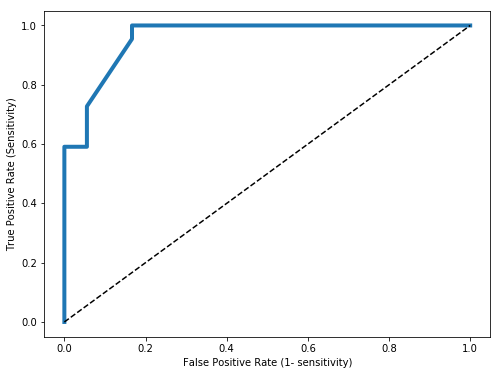

In [42]:
y_pred1 = logreg.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve

fpr, tpr, treshold = roc_curve(y_test, y_pred1)

plt.figure(figsize = (8,6))

plt.plot(fpr,tpr,linewidth = 4)

plt.plot([0,1],[0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.xlabel('False Positive Rate (1- sensitivity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()